In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import data

In [ ]:
import os
path = os.listdir('/content/drive/MyDrive/tumor_data/Training')
classes = {'no_tumor':0, 'pituitary_tumor':1, 'glioma_tumor':2, 'meningioma_tumor':3}

In [ ]:
import cv2
x = []
y = []
for cls in classes:
  pth = '/content/drive/MyDrive/tumor_data/Training/'+cls
  for j in os.listdir(pth):
    img = cv2.imread(pth+'/'+j, 0)
    img = cv2.resize(img, (200,200))
    x.append(img)
    y.append(classes[cls])

    


In [ ]:
np.unique(y)

array([0, 1, 2, 3])

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
pd.Series(y).value_counts()

1    827
2    826
3    822
0    395
dtype: int64

In [ ]:
x.shape

(2870, 200, 200)

visualize data

(-0.5, 199.5, 199.5, -0.5)

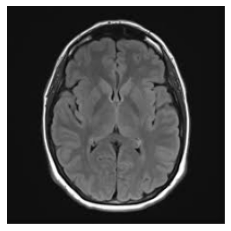

In [ ]:
plt.imshow(x[23], cmap='gray')
plt.axis('off')

prepare data

In [ ]:
x_update = x.reshape(len(x), -1)
x_update.shape

(2870, 40000)

split data

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x_update, y, random_state=10, test_size=.20)


In [ ]:
x_train.shape, x_test.shape

((2296, 40000), (574, 40000))

In [ ]:
y_train.shape, y_test.shape

((2296,), (574,))

In [ ]:
x_train = x_train/255
x_test = x_test/255

Training model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(x_train, y_train)

SVC()

In [ ]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print("training data accuracy:", training_data_accuracy)

training data accuracy: 0.9407665505226481


In [ ]:
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print("test data accuracy:", test_data_accuracy)

test data accuracy: 0.7979094076655052


Test model

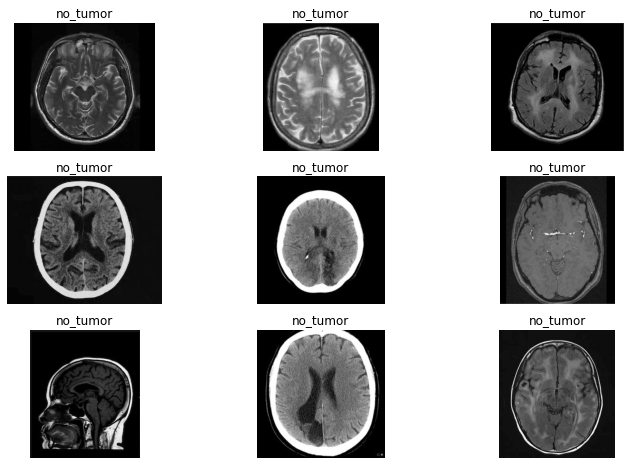

In [ ]:
from numpy.ma.core import reshape
categories = {'no_tumor':0, 'pituitary_tumor':1, 'glioma_tumor':2, 'meningioma_tumor':3}
c=1
plt.figure(figsize=(12,8))
path = os.listdir('/content/drive/MyDrive/tumor_data/Testing/')
for i in os.listdir('/content/drive/MyDrive/tumor_data/Testing/no_tumor/')[:9]:
  plt.subplot(3, 3, c)
  img=cv2.imread('/content/drive/MyDrive/tumor_data/Testing/no_tumor/'+i,0)
  img1=cv2.resize(img, (200,200))
  img1=img1.reshape(1, -1)/255
  pred = classifier.predict(img1)
  if pred[0] == 0:
    plt.title('no_tumor')
  elif pred[0] == 1:
    plt.title('pituitary_tumor')
  elif pred[0] == 2:
    plt.title('gioma_tumor')
  else:
    plt.title('meningioma_tumor')
  
  
  #plt.title(categories[pred])
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  c+=1 


error: ignored

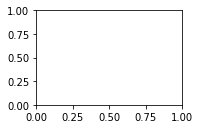

In [98]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/tumor_data/Testing')
c=1
for i in os.listdir('/content/drive/MyDrive/tumor_data/Testing/pituitary_tumor')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/content/drive/MyDrive/tumor_data/Testing/pituitary_tumor'+i,0)
    img1 = cv2.resize(img, (200, 200), fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
    img1 = img1.reshape(1,-1)/255
    p = classifier.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [83]:
img = cv2.imread('/content/drive/MyDrive/tumor_data/Testing/pituitary_tumor/image(19).jpg')
img.shape


(502, 502, 3)

In [84]:
img=cv2.resize(img, (200,200))
img.shape

(200, 200, 3)

In [ ]:
a=[]
a.append(img)

In [85]:
img1=img.reshape(3, -1)/255
img1.shape

(3, 40000)

In [86]:
pred = classifier.predict(img1)

In [87]:
pred[0]

3